In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls drive/MyDrive/Henry_Proyecto_Individual_1/Datasets/CSV

steam_games.csv  user_items.csv  user_review.csv


In [3]:
###El path to the user_review file
user_review_path = "drive/MyDrive/Henry_Proyecto_Individual_1/Datasets/CSV/user_review.csv"

###Limpieza rapida de los datos para hacer el analisis de sentimiento



In [4]:
import pandas as pd
import ast

In [5]:
###Aqui la limpieza
# df = pd.read_csv(user_review_path)

In [6]:
###Vuelvo a leer el archivo json porque al momento de transformarlo a csv antes de separar los diccionarios no me deja hacer el explode, pero al leerlo desde el json si me deja
import gzip
user_reviews_path = "drive/MyDrive/Henry_Proyecto_Individual_1/Datasets/user_reviews.json.gz"
###Convertimos el user_review un dataframe
# user_review = pd.read_json(user_reviews_path, compression="gzip", lines=True)
rows=[]
with gzip.open(user_reviews_path, 'rt', encoding='MacRoman') as archivo:
    for line in archivo.readlines():
        rows.append(ast.literal_eval(line))

user_review_df = pd.DataFrame(rows)
user_review_df

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [7]:
user_review_explode = user_review_df.explode('reviews')
user_review_explode = pd.concat([user_review_explode.drop(['reviews'],axis=1),user_review_explode['reviews'].apply(pd.Series)],axis=1)

In [8]:
user_review_explode

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,0
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,NaN
1,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,NaN
1,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,NaN
...,...,...,...,...,...,...,...,...,...,...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,NaN
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,NaN
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,NaN
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D,NaN


In [9]:
user_review_explode.drop(columns=['funny','last_edited',0],inplace=True)
df_review = user_review_explode
df_review

,user_id,user_url,posted,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,No ratings yet,True,Simple yet with great replayability. In my opi...
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted July 15, 2011.",22200,No ratings yet,True,It's unique and worth a playthrough.
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted April 21, 2011.",43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
1,js41637,http://steamcommunity.com/id/js41637,"Posted June 24, 2014.",251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
1,js41637,http://steamcommunity.com/id/js41637,"Posted September 8, 2013.",227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,Posted July 10.,70,No ratings yet,True,a must have classic from steam definitely wort...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,Posted July 8.,362890,No ratings yet,True,this game is a perfect remake of the original ...
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,Posted July 3.,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,Posted July 20.,730,No ratings yet,True,:D


In [10]:
##Eliminamos duplicados
print(df_review.shape)
df_review = df_review.drop_duplicates()
df_review.shape

(59333, 7)


(58459, 7)

In [11]:
# ##Eliminamos datos nulos
# print(df.shape)
# df = df.dropna()
# df.shape
# ##No hay datos nulos

In [12]:
##Vemos que tipo de datos tiene la columna review
print(df_review["review"].dtype)
###Convertimos la columna review en str
df_review["review"] = df_review["review"].astype(str)

object


<ipython-input-12-8324977e1a25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["review"] = df_review["review"].astype(str)


In [13]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

##Descargando recursos necesarios de NLTK
# nltk.download('vader_lexion')


##Inicializamos el analizador de sentimiento de NLTK
sia = SentimentIntensityAnalyzer()

##Función para asignar un valor de sentimiento a cada reseña
def analize_sentiment(review):
  ##Aplicamos el análisis de sentimiento y devuelve la categoria (0, 1, 2)
  sentiment_score = sia.polarity_scores(review)['compound']
  return 0 if sentiment_score < -0.3 else 2 if sentiment_score >= 0.3 else 1

  ##Aplicamos la función a la columna de reseñas y creamos la nueva columna "sentiment_analysis"
  df_review["sentiment_analysis"] = df_review["review"].apply(analyze_sentiment)

  ##Mostramos la primeras filas del DataFrame resultante
  print(df_review[["review", "sentiment_analysis"]].head())

  ##Guardamos el DataFrame Actualizado en un nuevo archivo csv
  # df.to_csv("user_review_sentiment_analysis.csv", index=False)

In [15]:
# Aplica la función analyze_sentiment a la columna 'user_reviews.review' y crea una nueva columna 'sentiment_analysis'
df_review['sentiment_analysis'] = df_review['review'].apply(analize_sentiment)

<ipython-input-15-def8b30b794c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review['sentiment_analysis'] = df_review['review'].apply(analize_sentiment)


In [16]:
df_review

,user_id,user_url,posted,item_id,helpful,recommend,review,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted July 15, 2011.",22200,No ratings yet,True,It's unique and worth a playthrough.,1
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted April 21, 2011.",43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2
1,js41637,http://steamcommunity.com/id/js41637,"Posted June 24, 2014.",251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2
1,js41637,http://steamcommunity.com/id/js41637,"Posted September 8, 2013.",227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,2
...,...,...,...,...,...,...,...,...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,Posted July 10.,70,No ratings yet,True,a must have classic from steam definitely wort...,2
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,Posted July 8.,362890,No ratings yet,True,this game is a perfect remake of the original ...,2
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,Posted July 3.,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,2
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,Posted July 20.,730,No ratings yet,True,:D,2


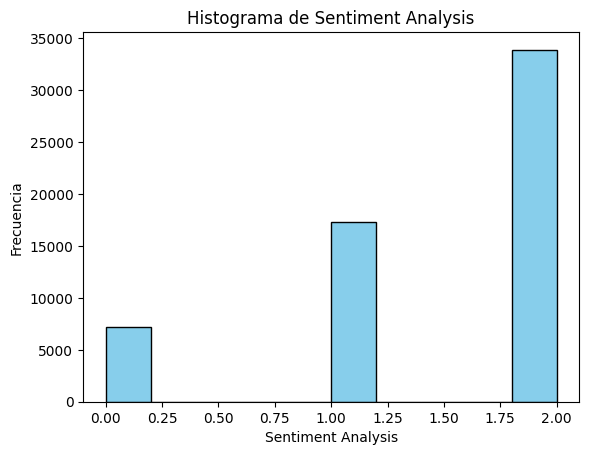

In [20]:
import matplotlib.pyplot as plt

# Crear el histograma con matplotlib
plt.hist(df_review['sentiment_analysis'], bins=10, color='skyblue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Sentiment Analysis')
plt.ylabel('Frecuencia')
plt.title('Histograma de Sentiment Analysis')

# Mostrar el histograma
plt.show()

In [22]:
df_review.to_csv("drive/MyDrive/Henry_Proyecto_Individual_1/Datasets/CSV/user_review_sentiment_analysis.csv", index=False)